In [1]:
#Importing Libraries

#import sys
#!{sys.executable} -m pip install pandas
import pandas as pd
#import sys
#!{sys.executable} -m pip install numpy
import numpy as np
#import sys
#!{sys.executable} -m pip install seaborn
import seaborn; seaborn.set()
#import sys
#!{sys.executable} -m pip install scikit-learn
from sklearn.metrics import mean_squared_error
#import sys
#!{sys.executable} -m pip install matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv("/Users/priyaramasamy/Downloads/GC=F (1).csv")

In [3]:
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2000-09-01  277.000000  277.000000  277.000000  277.000000  277.000000   
1  2000-09-03         NaN         NaN         NaN         NaN         NaN   
2  2000-09-04         NaN         NaN         NaN         NaN         NaN   
3  2000-09-05  275.799988  275.799988  275.799988  275.799988  275.799988   
4  2000-09-06  274.200012  274.200012  274.200012  274.200012  274.200012   

   Volume  
0     0.0  
1     NaN  
2     NaN  
3     2.0  
4     0.0  


In [4]:
print(data.tail())

            Date         Open         High          Low        Close  \
6279  2021-02-18  1776.099976  1784.599976  1766.000000  1773.400024   
6280  2021-02-19  1764.300049  1787.599976  1764.300049  1775.800049   
6281  2021-02-21          NaN          NaN          NaN          NaN   
6282  2021-02-22  1784.000000  1807.800049  1784.000000  1806.699951   
6283  2021-02-23  1809.599976  1811.300049  1796.400024  1804.400024   

        Adj Close  Volume  
6279  1773.400024   587.0  
6280  1775.800049   118.0  
6281          NaN     NaN  
6282  1806.699951   165.0  
6283  1804.400024   569.0  


In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6284 non-null   object 
 1   Open       5103 non-null   float64
 2   High       5103 non-null   float64
 3   Low        5103 non-null   float64
 4   Close      5103 non-null   float64
 5   Adj Close  5103 non-null   float64
 6   Volume     5103 non-null   float64
dtypes: float64(6), object(1)
memory usage: 343.8+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000
mean,1003.848148,1008.938723,998.357829,1003.706388,1003.706388,4263.250637
std,482.742201,485.718551,479.389156,482.597292,482.597292,24590.644414
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,467.949997,468.549988,466.899994,467.550003,467.550003,17.000000
50%,1160.099976,1166.800049,1152.599976,1160.400024,1160.400024,93.000000
75%,1324.700012,1330.649964,1319.750000,1324.099976,1324.099976,350.500000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


In [8]:
data = pd.read_csv("/Users/priyaramasamy/Downloads/GC=F (1).csv",index_col='Date')
print(data.head(5))
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-09-01  277.000000  277.000000  277.000000  277.000000  277.000000     0.0
2000-09-03         NaN         NaN         NaN         NaN         NaN     NaN
2000-09-04         NaN         NaN         NaN         NaN         NaN     NaN
2000-09-05  275.799988  275.799988  275.799988  275.799988  275.799988     2.0
2000-09-06  274.200012  274.200012  274.200012  274.200012  274.200012     0.0
<class 'pandas.core.frame.DataFrame'>
Index: 6284 entries, 2000-09-01 to 2021-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5103 non-null   float64
 1   High       5103 non-null   float64
 2   Low        5103 non-null   float64
 3   Close      5103 non-null   float64
 4   Adj Close  5103 non-null   float64
 5   Volume     5103 non-null   float64
dtypes: flo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0


In [9]:
data = data.sort_index()
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0


In [10]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-18,1776.099976,1784.599976,1766.000000,1773.400024,1773.400024,587.0
2021-02-19,1764.300049,1787.599976,1764.300049,1775.800049,1775.800049,118.0
2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-22,1784.000000,1807.800049,1784.000000,1806.699951,1806.699951,165.0
2021-02-23,1809.599976,1811.300049,1796.400024,1804.400024,1804.400024,569.0


In [11]:
data.shape

(6284, 6)

In [12]:
gold = data.dropna()

In [13]:
gold.shape

(5103, 6)

In [14]:
gold.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0
2000-09-07,274.000000,274.000000,274.000000,274.000000,274.000000,125.0
2000-09-08,273.299988,273.299988,273.299988,273.299988,273.299988,0.0


In [15]:
gold.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-17,1785.800049,1789.699951,1768.800049,1771.099976,1771.099976,614.0
2021-02-18,1776.099976,1784.599976,1766.000000,1773.400024,1773.400024,587.0
2021-02-19,1764.300049,1787.599976,1764.300049,1775.800049,1775.800049,118.0
2021-02-22,1784.000000,1807.800049,1784.000000,1806.699951,1806.699951,165.0
2021-02-23,1809.599976,1811.300049,1796.400024,1804.400024,1804.400024,569.0


Text(0, 0.5, 'Daily Gold Price')

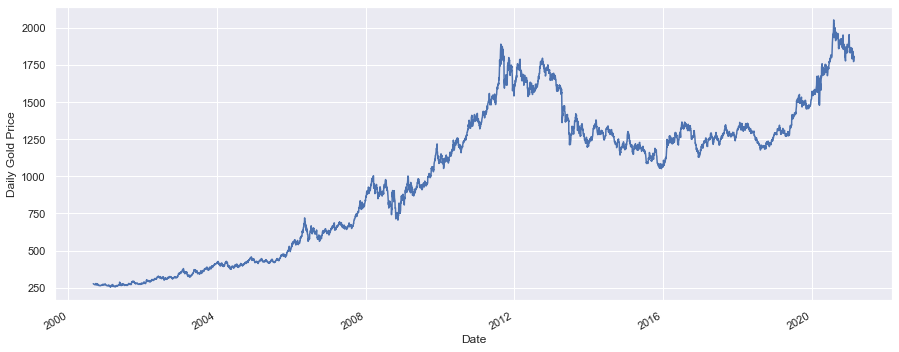

In [16]:
gold['Close'].plot()
plt.ylabel("Daily Gold Price")

In [17]:
data = gold['Close']

In [18]:
data.head()

Date
2000-09-01    277.000000
2000-09-05    275.799988
2000-09-06    274.200012
2000-09-07    274.000000
2000-09-08    273.299988
Name: Close, dtype: float64

In [19]:
data.tail()

Date
2021-02-17    1771.099976
2021-02-18    1773.400024
2021-02-19    1775.800049
2021-02-22    1806.699951
2021-02-23    1804.400024
Name: Close, dtype: float64

Text(0, 0.5, 'Weekly Gold Price')

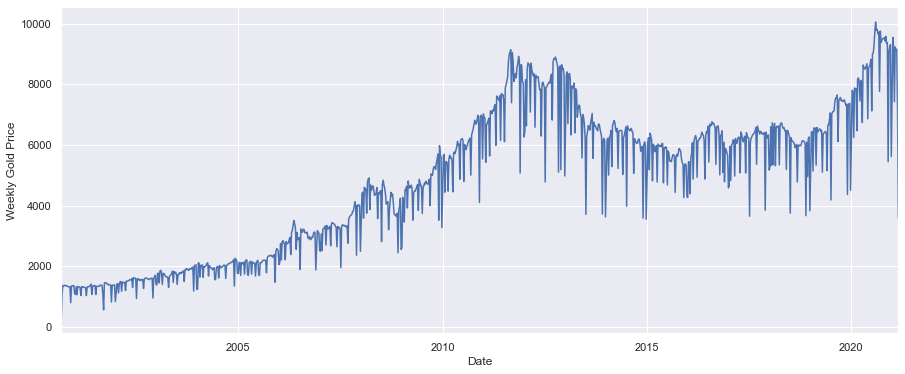

In [20]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel("Weekly Gold Price")

<AxesSubplot:xlabel='Date'>

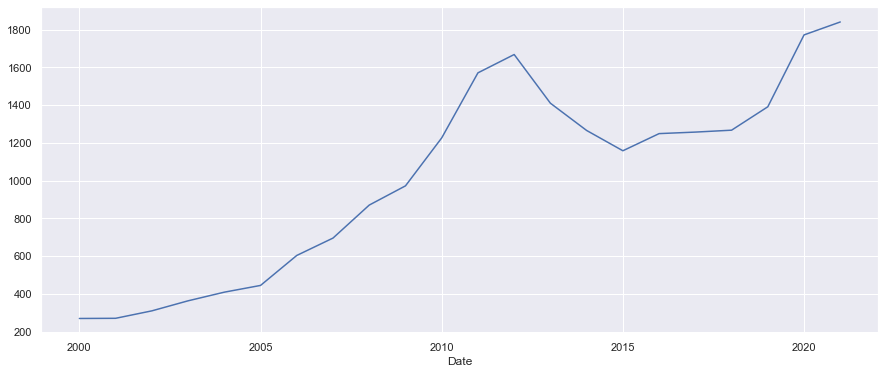

In [21]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()

<AxesSubplot:>

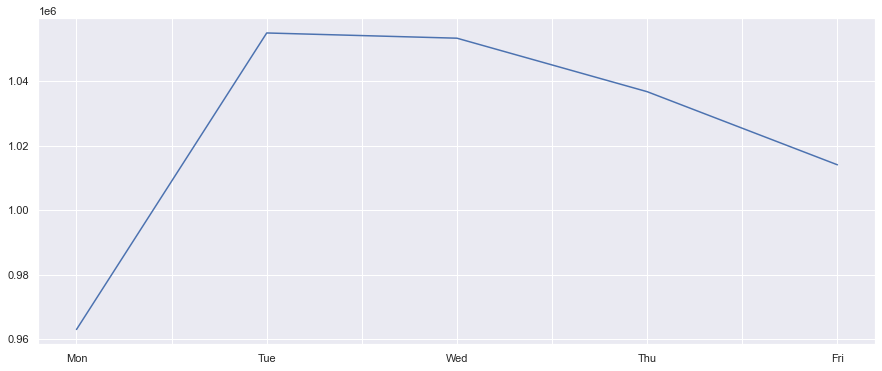

In [22]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon','Tue','Wed','Thu','Fri']
by_weekday.plot()

<AxesSubplot:xlabel='Date'>

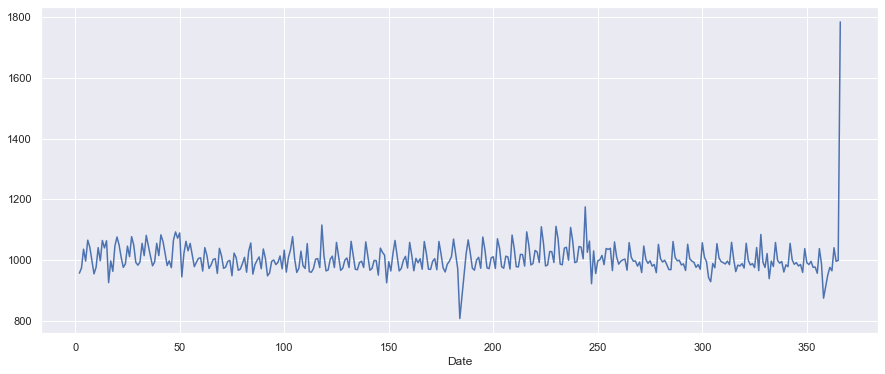

In [23]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

<AxesSubplot:xlabel='Date'>

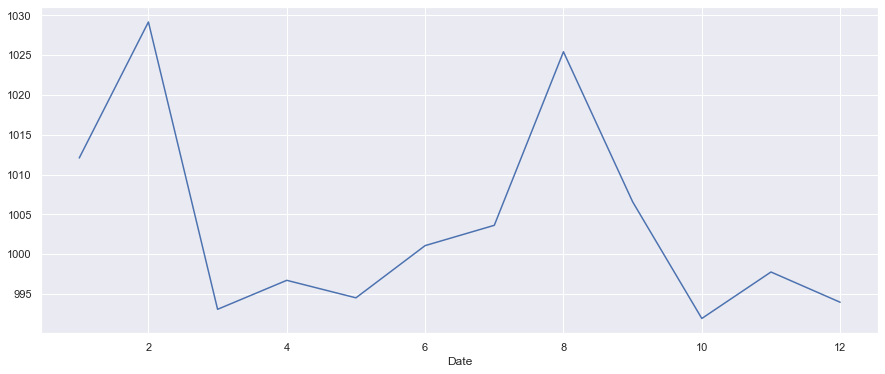

In [24]:
by_month = data.groupby(data.index.month).mean()
by_month.plot()

<AxesSubplot:xlabel='Date'>

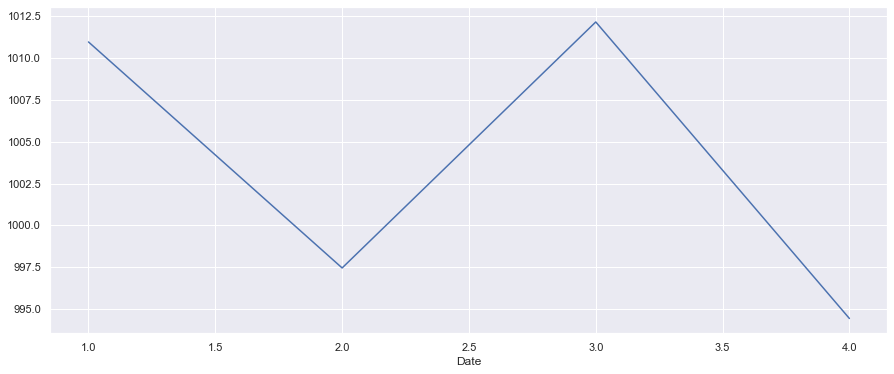

In [25]:
by_quarter = data.groupby(data.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

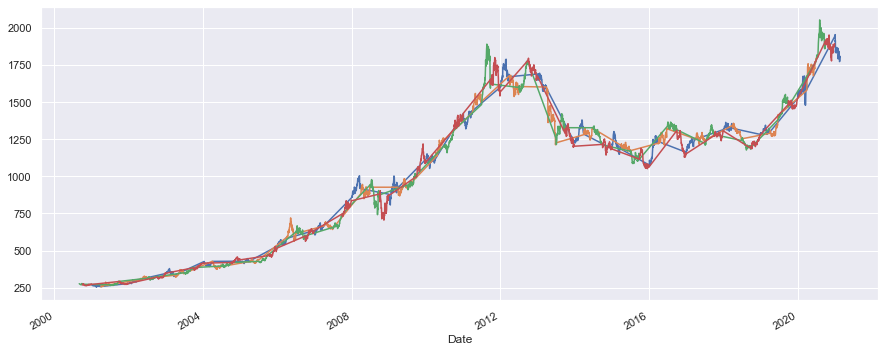

In [26]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

<AxesSubplot:xlabel='Date'>

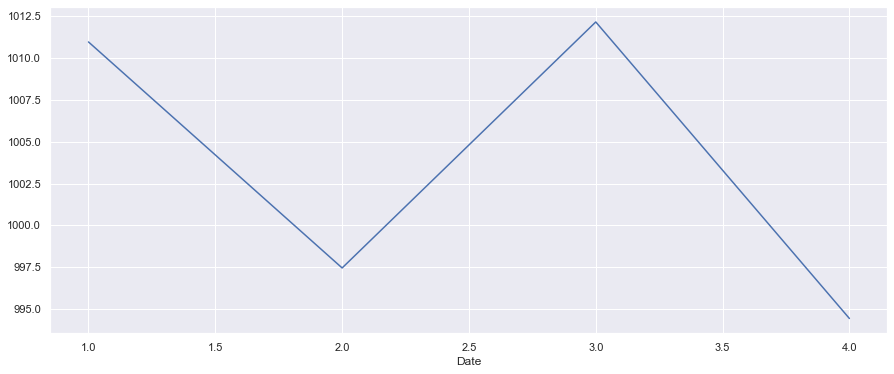

In [27]:
by_quarter_overall = data.groupby(data.index.quarter).mean()
by_quarter_overall.plot()

<AxesSubplot:title={'center':'weekdays'}, xlabel='Date'>

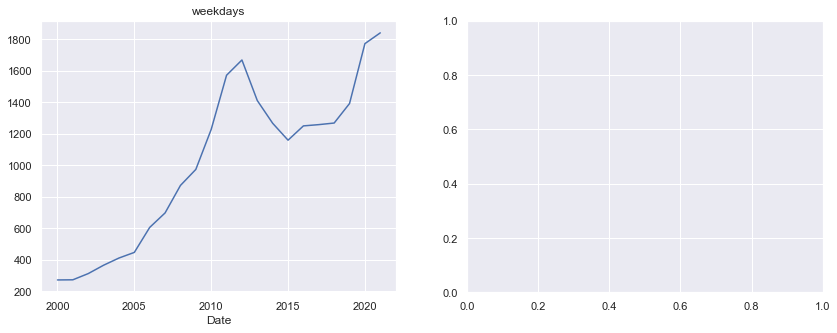

In [28]:
weekend = np.where(data.index.weekday < 5, 'weekday', 'weekend')
by_time = data.groupby([weekend, data.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize = (14,5))
by_time.loc['weekday'].plot(ax=ax[0], title='weekdays')
#by_time.loc['weekend'].plot(ax=ax[1], title='weekends')

In [29]:
ts = data

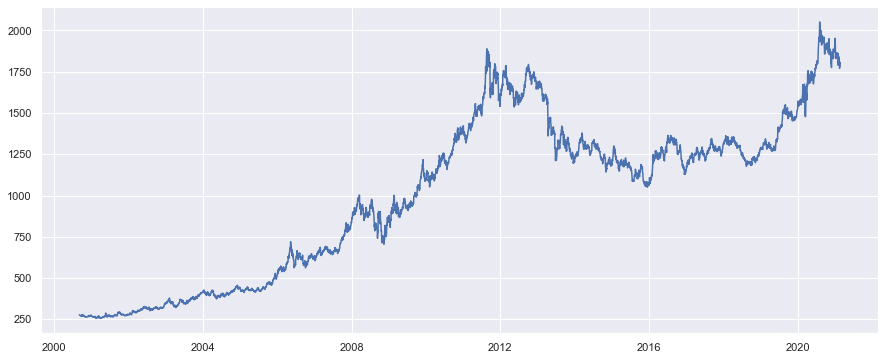

In [30]:
plt.plot(ts)

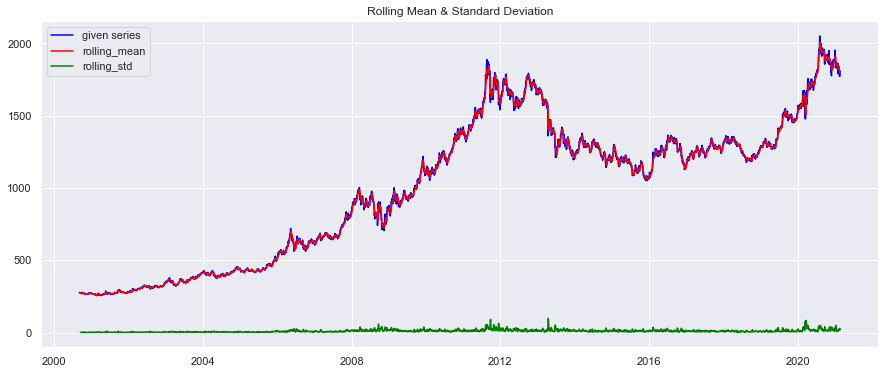

Result of Dickey-Fuller Test:
Test Statistic                  -0.717443
p-value                          0.842180
#lags Used                      11.000000
Number of observation used    5091.000000
Critical value (1%)             -3.431635
Critical value (5%)             -2.862108
Critical value (10%)            -2.567072
dtype: float64


In [31]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7, center = False).mean()
    r_std = input_data.rolling(window = 7, center = False).std()
    
    #plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color = 'green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #perform Dickey-Fuller test
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags Used','Number of observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
   
test_for_stationary(ts)

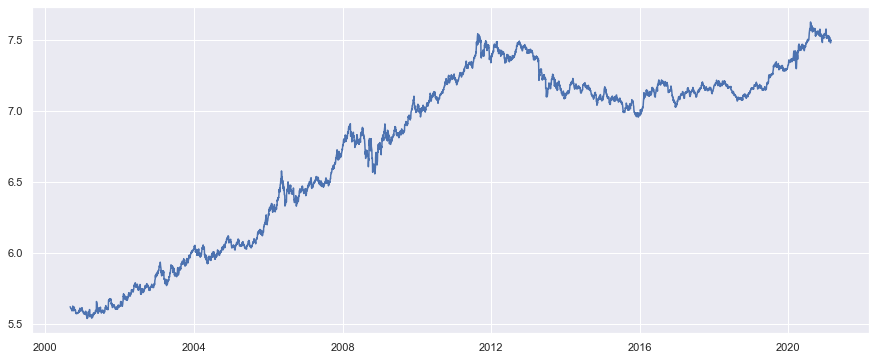

In [32]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [33]:
ts_logtransformed.head(10)

Date
2000-09-01    5.624018
2000-09-05    5.619676
2000-09-06    5.613858
2000-09-07    5.613128
2000-09-08    5.610570
2000-09-11    5.609838
2000-09-12    5.609105
2000-09-13    5.608739
2000-09-14    5.607272
2000-09-15    5.606904
Name: Close, dtype: float64

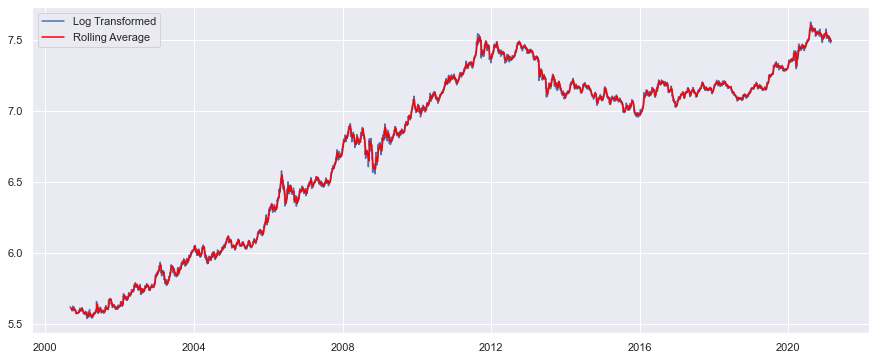

In [34]:
Rolling_average = ts_logtransformed.rolling(window = 7, center = False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [35]:
Rolling_average.head(10)

Date
2000-09-01         NaN
2000-09-05         NaN
2000-09-06         NaN
2000-09-07         NaN
2000-09-08         NaN
2000-09-11         NaN
2000-09-12    5.614313
2000-09-13    5.612131
2000-09-14    5.610359
2000-09-15    5.609365
Name: Close, dtype: float64

In [36]:
log_rolling_difference = ts_logtransformed - Rolling_average
log_rolling_difference.head(10)
log_rolling_difference.tail(10)

Date
2021-02-09    0.004479
2021-02-10    0.008922
2021-02-11    0.000794
2021-02-12   -0.000187
2021-02-16   -0.014334
2021-02-17   -0.025788
2021-02-18   -0.019854
2021-02-19   -0.013794
2021-02-22    0.006113
2021-02-23    0.006453
Name: Close, dtype: float64

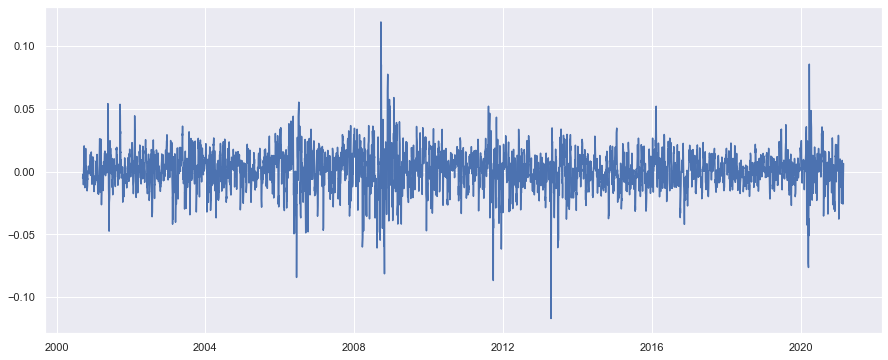

In [37]:
log_rolling_difference.dropna(inplace = True)
plt.plot(log_rolling_difference)

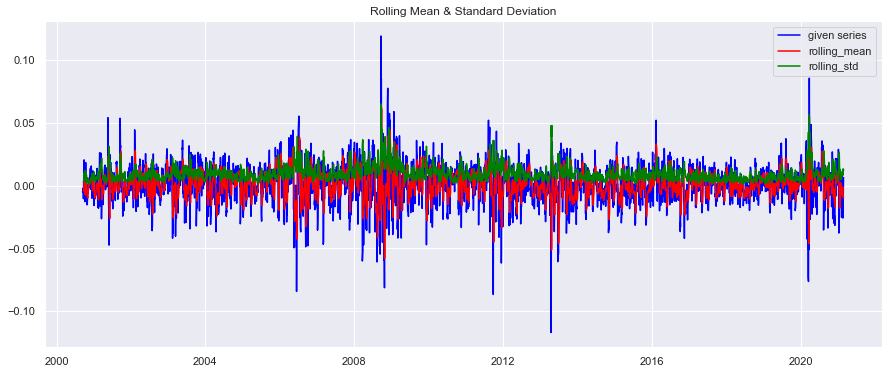

Result of Dickey-Fuller Test:
Test Statistic               -1.592733e+01
p-value                       7.800392e-29
#lags Used                    2.000000e+01
Number of observation used    5.076000e+03
Critical value (1%)          -3.431639e+00
Critical value (5%)          -2.862110e+00
Critical value (10%)         -2.567073e+00
dtype: float64


In [38]:
test_for_stationary(log_rolling_difference)

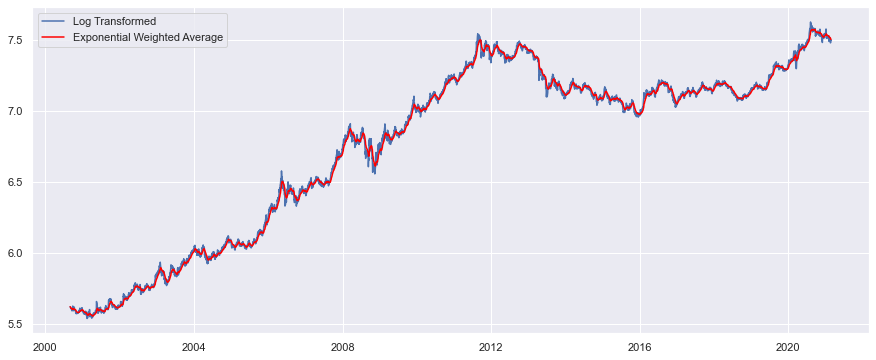

In [39]:
expweighted_avg = ts_logtransformed.ewm(halflife = 7, min_periods = 0, adjust = True, ignore_na = False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(expweighted_avg, color = 'red', label = 'Exponential Weighted Average')
plt.legend(loc = 'best')

In [40]:
expweighted_avg.head(10)

Date
2000-09-01    5.624018
2000-09-05    5.621739
2000-09-06    5.618848
2000-09-07    5.617199
2000-09-08    5.615599
2000-09-11    5.614386
2000-09-12    5.613391
2000-09-13    5.612589
2000-09-14    5.611739
2000-09-15    5.611014
Name: Close, dtype: float64

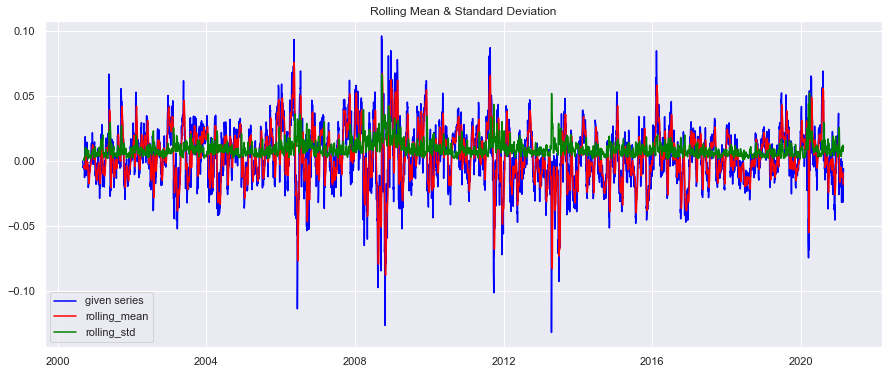

Result of Dickey-Fuller Test:
Test Statistic               -1.361898e+01
p-value                       1.811949e-25
#lags Used                    1.100000e+01
Number of observation used    5.091000e+03
Critical value (1%)          -3.431635e+00
Critical value (5%)          -2.862108e+00
Critical value (10%)         -2.567072e+00
dtype: float64


In [41]:
log_expmovwt_diff = ts_logtransformed - expweighted_avg
test_for_stationary(log_expmovwt_diff)

<AxesSubplot:xlabel='Date'>

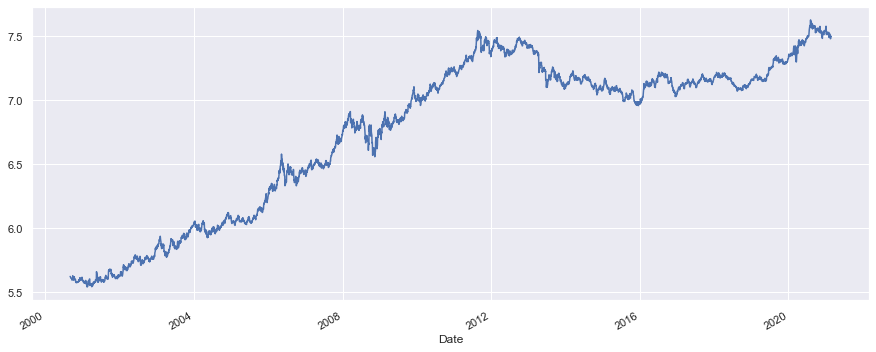

In [42]:
ts_logtransformed.plot()

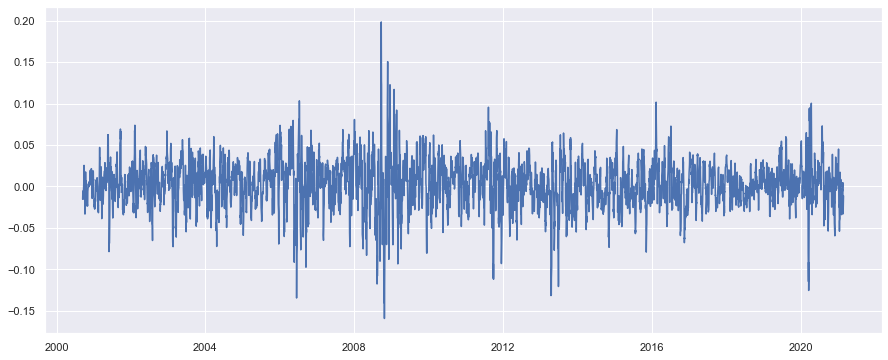

In [43]:
ts_diff_logtrans = ts_logtransformed - ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)

In [44]:
ts_diff_logtrans.head(10)

Date
2000-09-01         NaN
2000-09-05         NaN
2000-09-06         NaN
2000-09-07         NaN
2000-09-08         NaN
2000-09-11         NaN
2000-09-12         NaN
2000-09-13   -0.015279
2000-09-14   -0.012404
2000-09-15   -0.006953
Name: Close, dtype: float64

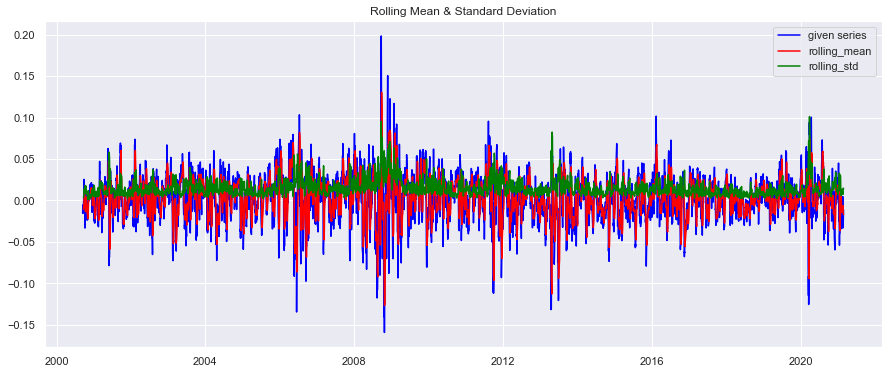

Result of Dickey-Fuller Test:
Test Statistic               -1.318102e+01
p-value                       1.196035e-24
#lags Used                    3.300000e+01
Number of observation used    5.062000e+03
Critical value (1%)          -3.431642e+00
Critical value (5%)          -2.862111e+00
Critical value (10%)         -2.567074e+00
dtype: float64


In [45]:
ts_diff_logtrans.dropna(inplace = True)
test_for_stationary(ts_diff_logtrans)

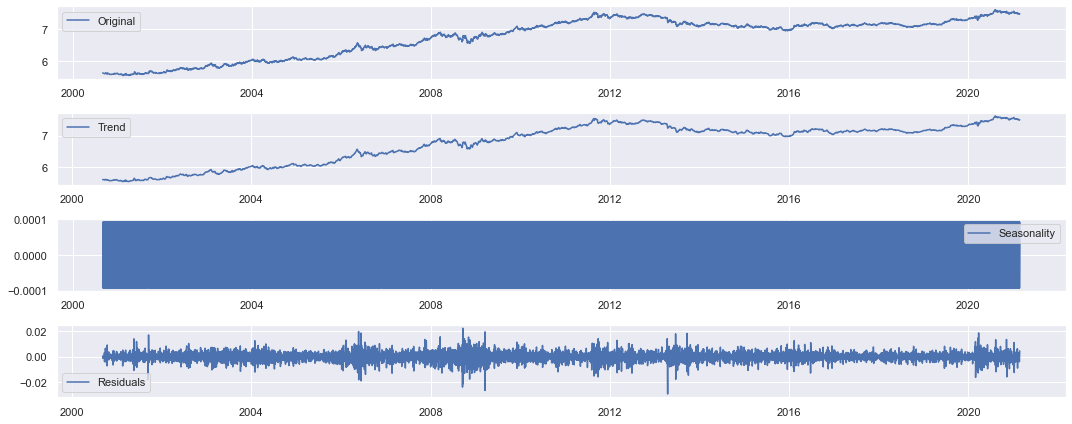

In [46]:
decomposition = seasonal_decompose(ts_logtransformed, period=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

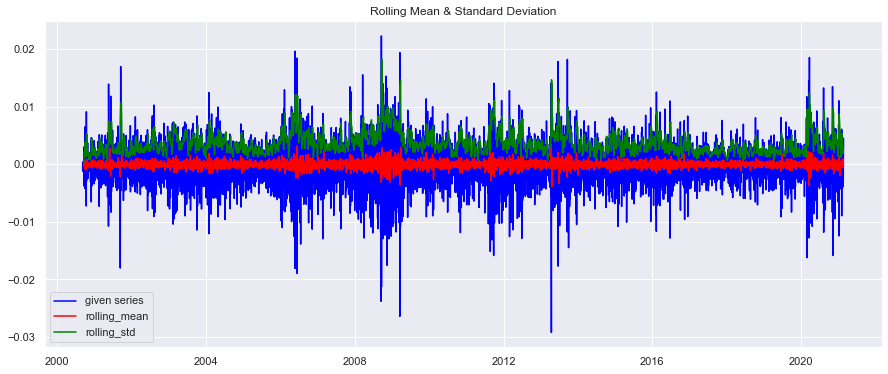

Result of Dickey-Fuller Test:
Test Statistic                 -20.948618
p-value                          0.000000
#lags Used                      33.000000
Number of observation used    5067.000000
Critical value (1%)             -3.431641
Critical value (5%)             -2.862111
Critical value (10%)            -2.567074
dtype: float64


In [47]:
decomposed_TS = residual
decomposed_TS.dropna(inplace = True)
test_for_stationary(decomposed_TS)

In [48]:
lag_acf = acf(ts_diff_logtrans, nlags = 30)
lag_pacf = pacf(ts_diff_logtrans, nlags = 50, method = 'ols')

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'AutoCorrelation Function')

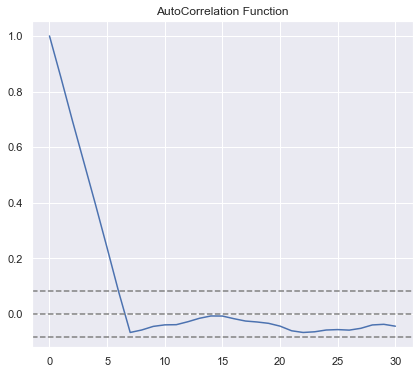

In [49]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-5.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=5.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('AutoCorrelation Function')

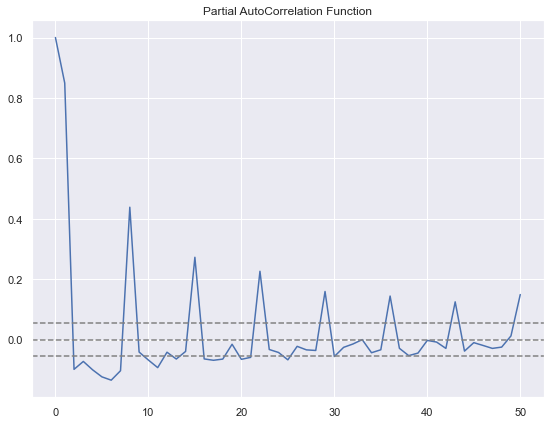

In [50]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-3.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=3.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

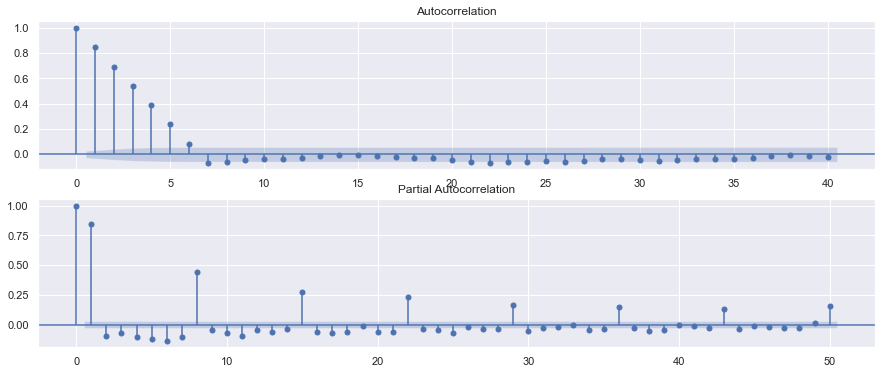

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(), lags =40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags =50)
pyplot.show()

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

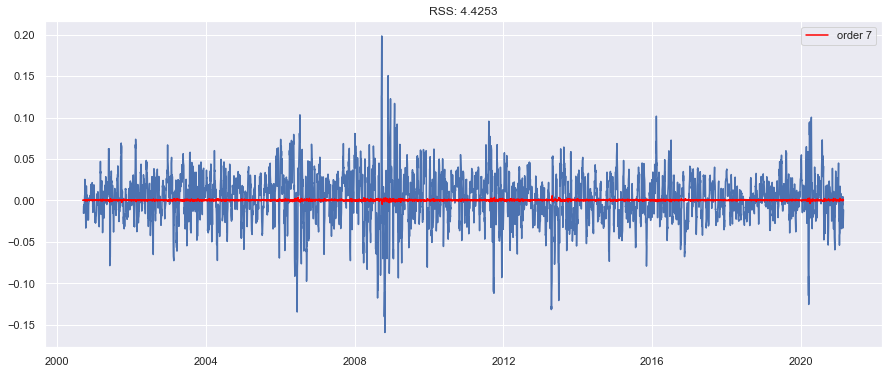

In [54]:
model = ARIMA(ts_logtransformed, order = (8,1,0))
result_AR = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 7')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [55]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5102
Model:                 ARIMA(8, 1, 0)   Log Likelihood               15692.594
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 25 Feb 2021   AIC                         -31365.188
Time:                        14:15:01   BIC                         -31299.814
Sample:                             1   HQIC                        -31342.299
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      2.555      0.011    8.57e-05       0.001
ar.L1.D.Close    -0.0098      0.014     -0.700      0.484      -0.037       0.018
ar.L2.D.Close    -0.0033      0.014     

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

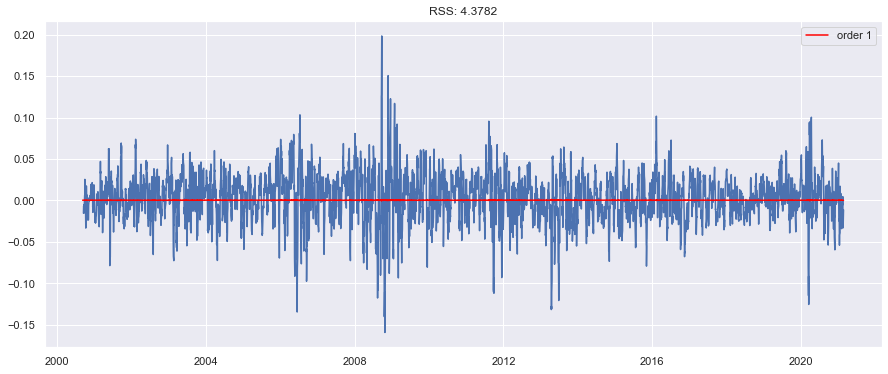

In [56]:
model = ARIMA(ts_logtransformed, order = (2,1,0))
result_AR = model.fit(disp=1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 1')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [57]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5102
Model:                 ARIMA(2, 1, 0)   Log Likelihood               15685.664
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 25 Feb 2021   AIC                         -31363.328
Time:                        14:15:02   BIC                         -31337.179
Sample:                             1   HQIC                        -31354.173
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      2.374      0.018     6.4e-05       0.001
ar.L1.D.Close    -0.0089      0.014     -0.633      0.527      -0.036       0.019
ar.L2.D.Close    -0.0029      0.014     

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

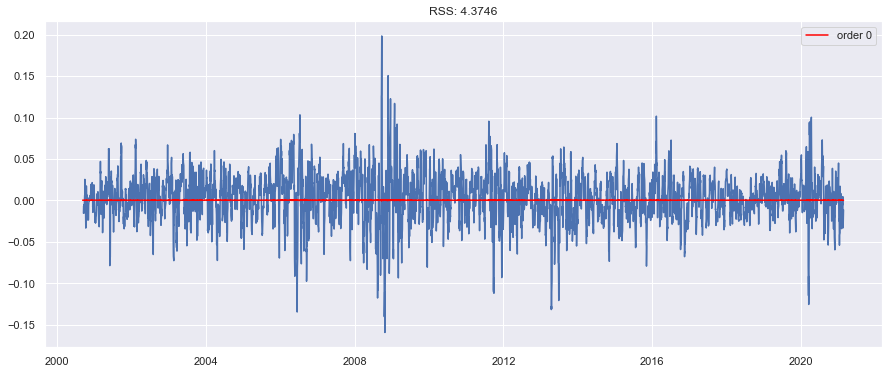

In [58]:
model = ARIMA(ts_logtransformed, order = (1,1,0))
result_AR = model.fit(disp=1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 0')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [59]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5102
Model:                 ARIMA(1, 1, 0)   Log Likelihood               15685.643
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 25 Feb 2021   AIC                         -31365.286
Time:                        14:15:03   BIC                         -31345.674
Sample:                             1   HQIC                        -31358.420
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      2.367      0.018    6.31e-05       0.001
ar.L1.D.Close    -0.0088      0.014     -0.631      0.528      -0.036       0.019
                                    Root

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

Text(0.5, 1.0, 'RSS: 4.3746')

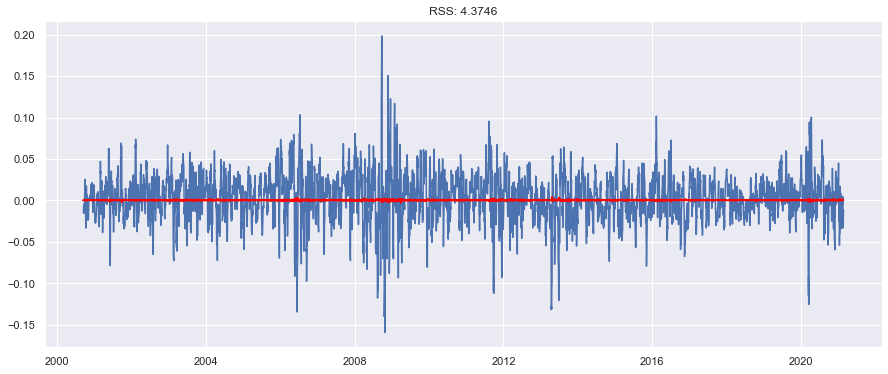

In [60]:
model = ARIMA(ts_logtransformed, order = (0,1,6))
result_MA = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_MA.fittedvalues, color = 'red', label = 'order 6')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
#plt.legend(loc = 'best')

In [61]:
print(result_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5102
Model:                 ARIMA(0, 1, 6)   Log Likelihood               15690.711
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 25 Feb 2021   AIC                         -31365.422
Time:                        14:15:04   BIC                         -31313.123
Sample:                             1   HQIC                        -31347.111
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      2.486      0.013    7.77e-05       0.001
ma.L1.D.Close    -0.0108      0.014     -0.774      0.439      -0.038       0.017
ma.L2.D.Close    -0.0035      0.014     

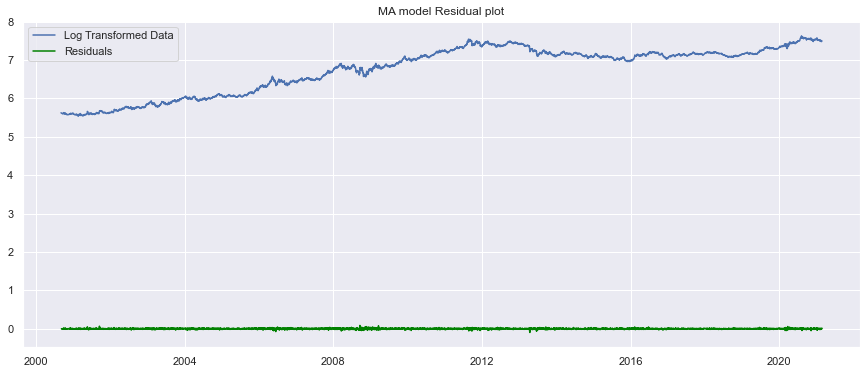

In [62]:
plt.plot(ts_logtransformed, label = 'Log Transformed Data')
plt.plot(result_MA.resid, color = 'green', label = 'Residuals')
plt.title('MA model Residual plot')
plt.legend(loc = 'best')

count    5.102000e+03
mean    -1.685770e-07
std      1.117311e-02
min     -9.817905e-02
25%     -5.211427e-03
50%      1.556810e-04
75%      5.887413e-03
max      8.530712e-02
dtype: float64


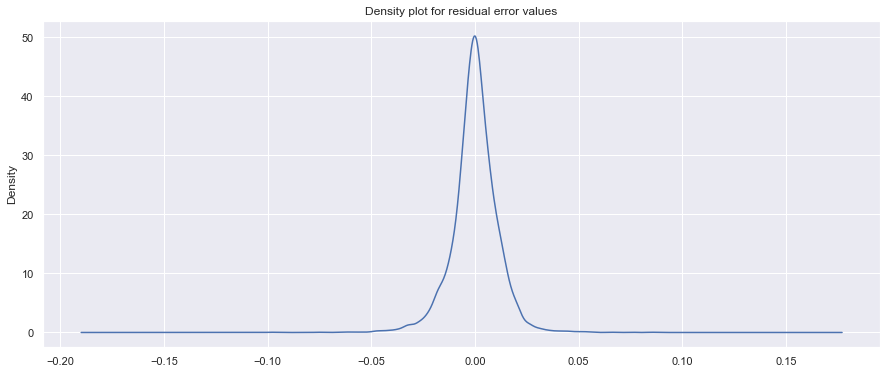

In [63]:
result_MA.resid.plot(kind = 'kde')
plt.title('Density plot for residual error values')
print(result_MA.resid.describe())

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

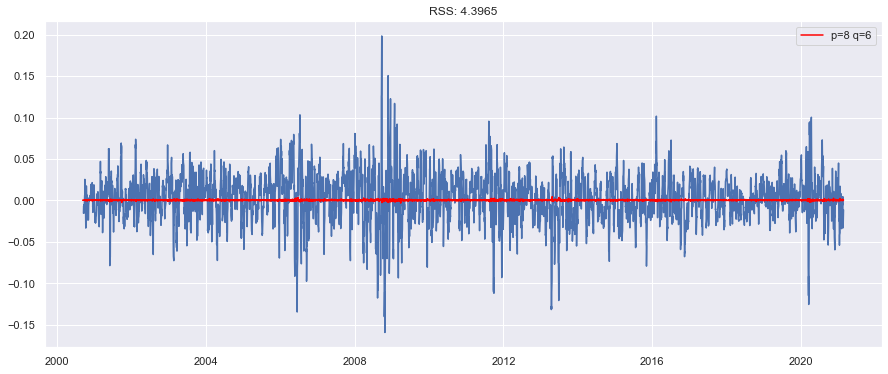

In [64]:
model = ARIMA(ts_logtransformed, order = (8,1,6))
result_ARIMA = model.fit(trend = 'nc',disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_MA.fittedvalues, color = 'red', label = 'p=8 q=6')
RSS = result_ARIMA.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [65]:
print(result_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5102
Model:                 ARIMA(8, 1, 6)   Log Likelihood               15703.175
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 25 Feb 2021   AIC                         -31376.351
Time:                        14:16:22   BIC                         -31278.290
Sample:                             1   HQIC                        -31342.017
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Close    -0.4627      0.518     -0.893      0.372      -1.478       0.553
ar.L2.D.Close    -0.2538      0.098     -2.579      0.010      -0.447      -0.061
ar.L3.D.Close     0.0408      0.117     

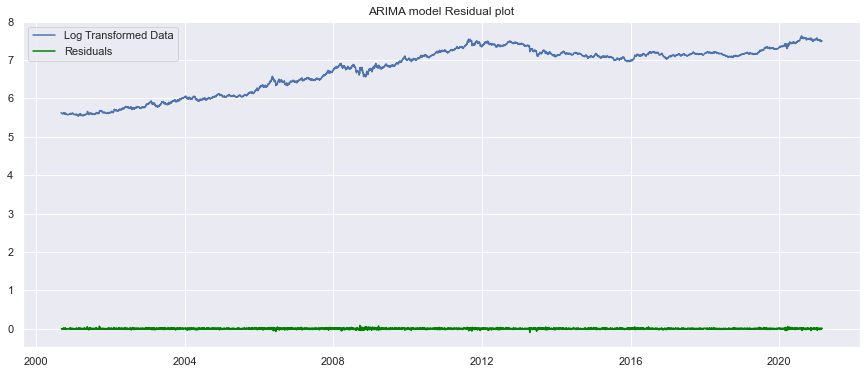

In [66]:
plt.plot(ts_logtransformed, label = 'Log Transformed Data')
plt.plot(result_ARIMA.resid, color = 'green', label = 'Residuals')
plt.title('ARIMA model Residual plot')
plt.legend(loc = 'best')

count    5102.000000
mean        0.000432
std         0.011137
min        -0.098938
25%        -0.004769
50%         0.000530
75%         0.006311
max         0.083734
dtype: float64


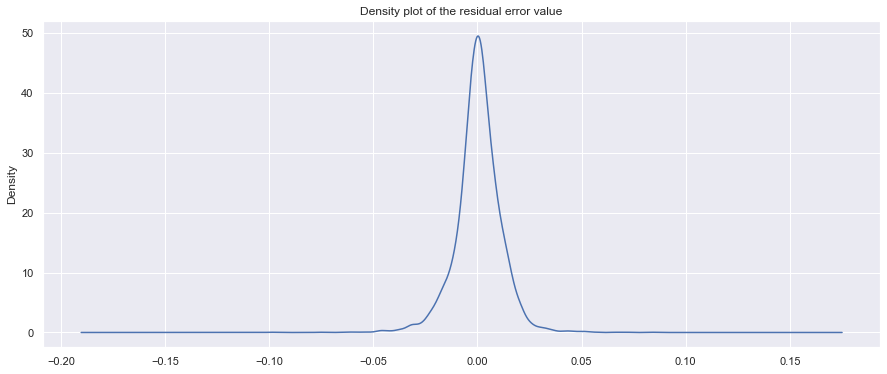

In [67]:
result_ARIMA.resid.plot(kind = 'kde')
plt.title('Density plot of the residual error value')
print(result_ARIMA.resid.describe())

In [68]:
test = pd.read_csv("/Users/priyaramasamy/Downloads/GC=F.csv",index_col='Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2010-01-04    1117.699951
2010-01-05    1118.099976
2010-01-06    1135.900024
2010-01-07    1133.099976
2010-01-08    1138.199951
                 ...     
2020-12-24            NaN
2020-12-27            NaN
2020-12-28    1877.199951
2020-12-29    1879.699951
2020-12-30    1891.000000
Name: Close, Length: 3342, dtype: float64

In [69]:
print(test[0])

1117.699951


In [70]:
test_data = test.dropna()

In [71]:
test_data.shape

(2744,)

In [72]:
test_data

Date
2010-01-04    1117.699951
2010-01-05    1118.099976
2010-01-06    1135.900024
2010-01-07    1133.099976
2010-01-08    1138.199951
                 ...     
2020-12-22    1866.599976
2020-12-23    1874.699951
2020-12-28    1877.199951
2020-12-29    1879.699951
2020-12-30    1891.000000
Name: Close, Length: 2744, dtype: float64

In [73]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

Date
2000-09-05    0.000000
2000-09-06    0.000034
2000-09-07    0.000053
2000-09-08   -0.000007
2000-09-11    0.000023
dtype: float64


In [74]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Date
2000-09-05    0.000000
2000-09-06    0.000034
2000-09-07    0.000086
2000-09-08    0.000080
2000-09-11    0.000102
dtype: float64


In [75]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

Date
2000-09-01    5.624018
2000-09-05    5.624018
2000-09-06    5.624051
2000-09-07    5.624104
2000-09-08    5.624097
dtype: float64

Text(0.5, 1.0, 'RMSE: 925.7522')

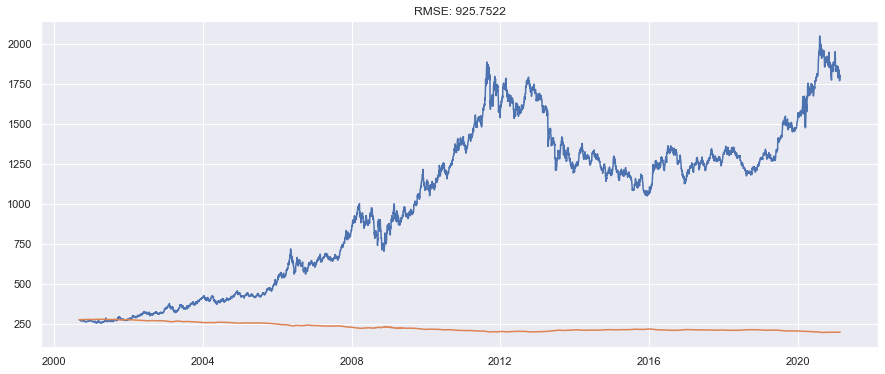

In [76]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title("RMSE: %.4f"%np.sqrt(sum((predictions_ARIMA - data)**2)/len(data)))

In [77]:
dates = [pd.Timestamp('2021-02-25'),pd.Timestamp('2021-02-26'),pd.Timestamp('2021-02-27'),pd.Timestamp('2021-02-28'),pd.Timestamp('2021-03-01')]

forecast = pd.Series(result_ARIMA.forecast(steps= 5)[0], dates)
print(forecast)
forecast = np.exp(forecast)
print(forecast)

2021-02-25    7.498979
2021-02-26    7.498063
2021-02-27    7.498226
2021-02-28    7.499747
2021-03-01    7.502088
dtype: float64
2021-02-25    1806.196529
2021-02-26    1804.543053
2021-02-27    1804.837975
2021-02-28    1807.585014
2021-03-01    1811.821306
dtype: float64


In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
#y_true = test
#y_pred = forecast
#error = mean_squared_error(y_true,y_pred)
#print('Test MSE: %.3f' %error)

In [80]:
#test.shape

In [81]:
#forecast.shape

In [82]:
prediction_MA_diff = pd.Series(result_MA.fittedvalues, copy = True)
print(prediction_MA_diff.head())

Date
2000-09-05    0.000368
2000-09-06    0.000419
2000-09-07    0.000451
2000-09-08    0.000371
2000-09-11    0.000394
dtype: float64


In [83]:
prediction_MA_diff_cumsum = prediction_MA_diff.cumsum()
print(prediction_MA_diff_cumsum.head())

Date
2000-09-05    0.000368
2000-09-06    0.000787
2000-09-07    0.001238
2000-09-08    0.001609
2000-09-11    0.002003
dtype: float64


In [84]:
prediction_MA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
prediction_MA_log = prediction_MA_log.add(prediction_MA_diff_cumsum, fill_value=0)
prediction_MA_log.head()

Date
2000-09-01    5.624018
2000-09-05    5.624385
2000-09-06    5.624804
2000-09-07    5.625256
2000-09-08    5.625627
dtype: float64

Text(0.5, 1.0, 'RMSE: 363.0848')

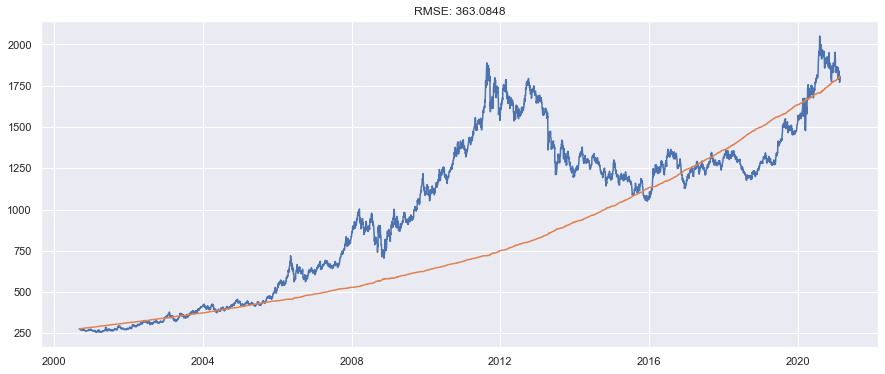

In [85]:
prediction_MA = np.exp(prediction_MA_log)
plt.plot(data)
plt.plot(prediction_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_MA - data)**2)/len(data)))

In [86]:
dates = [pd.Timestamp('2021-02-25'),pd.Timestamp('2021-02-26'),pd.Timestamp('2021-02-27'),pd.Timestamp('2021-02-28'),pd.Timestamp('2021-03-01')]

forecast = pd.Series(result_MA.forecast(steps= 5)[0], dates)
print(forecast)
forecast = np.exp(forecast)
print(forecast)

2021-02-25    7.498855
2021-02-26    7.499965
2021-02-27    7.500188
2021-02-28    7.500568
2021-03-01    7.500935
dtype: float64
2021-02-25    1805.973835
2021-02-26    1807.979678
2021-02-27    1808.383162
2021-02-28    1809.069228
2021-03-01    1809.734275
dtype: float64


In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
#y_true = test
#y_pred = forecast
#error = mean_squared_error(y_true,y_pred)
#print('Test MSE: %.3f' %error)

In [89]:
#test.shape

In [90]:
#test.shape

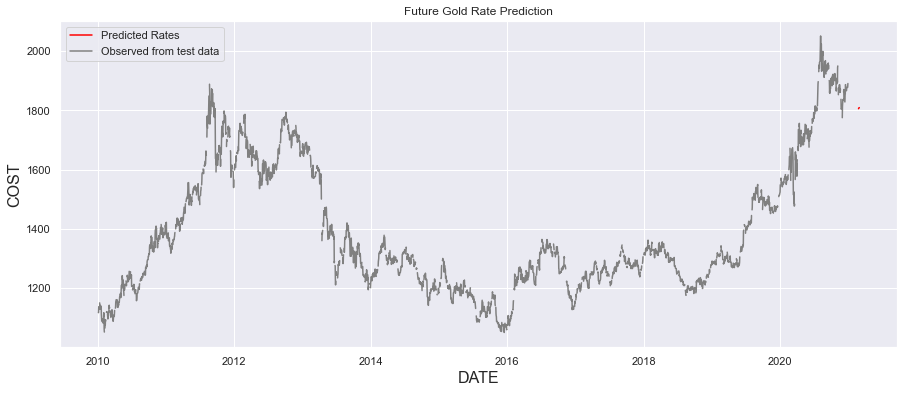

In [91]:
plt.plot(forecast, color = 'red', label = 'Predicted Rates')
plt.plot(test, color ='gray', label = 'Observed from test data')
plt.title('Future Gold Rate Prediction')
plt.ylabel('COST',fontsize = 16)
plt.xlabel('DATE',fontsize = 16)
plt.legend(loc = 'best')